In [1]:
import sys
import scanpy.api as sc


# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()



Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'feature_types' as categorical
... storing 'genome' as categorical


saving figure to file ./figures/pcabeforefilterPCA.pdf


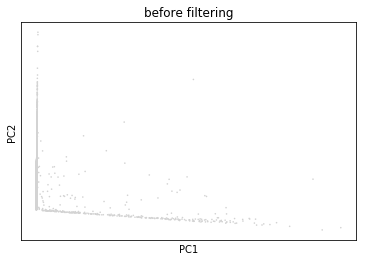

In [2]:
#PCA before filtering
sc.tl.pca(adata, n_comps=50, zero_center=True, svd_solver='auto', random_state=0, return_info=False, use_highly_variable=None, dtype='float32', copy=False, chunked=False, chunk_size=None)

sc.pl.pca(adata, title='before filtering', save= 'beforefilterPCA')



In [3]:
#filter
sc.pp.recipe_zheng17(adata, n_top_genes=1000, log=True, plot=False, copy=False)

saving figure to file ./figures/pcaafterfilterPCA.pdf


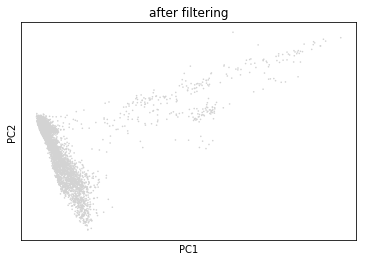

In [4]:
#PCA after filtering
sc.tl.pca(adata, n_comps=50, zero_center=True, svd_solver='auto', random_state=0, return_info=False, use_highly_variable=None, dtype='float32', copy=False, chunked=False, chunk_size=None)
sc.pl.pca(adata, title="after filtering", save= 'afterfilterPCA')

In [9]:
#Step 2
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=None, use_rep=None, knn=True, random_state=0, method='umap', metric='euclidean', metric_kwds={}, copy=False)
sc.tl.louvain(adata, resolution=None, random_state=0, restrict_to=None, key_added=None, adjacency=None, flavor='vtraag', directed=True, use_weights=False, partition_type=None, partition_kwargs=None, copy=False)

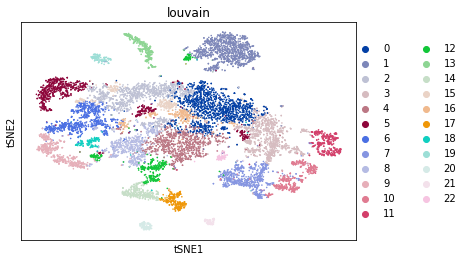

In [12]:
sc.tl.tsne(adata, n_pcs=50, use_rep=None, perplexity=30, early_exaggeration=12, learning_rate=1000, random_state=0, use_fast_tsne=True, n_jobs=None, copy=False)
sc.pl.tsne(adata, color='louvain')

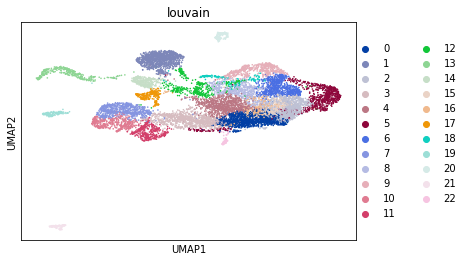

In [13]:
sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2, maxiter=None, alpha=1.0, gamma=1.0, negative_sample_rate=5, init_pos='spectral', random_state=0, a=None, b=None, copy=False)
sc.pl.umap(adata, color='louvain')

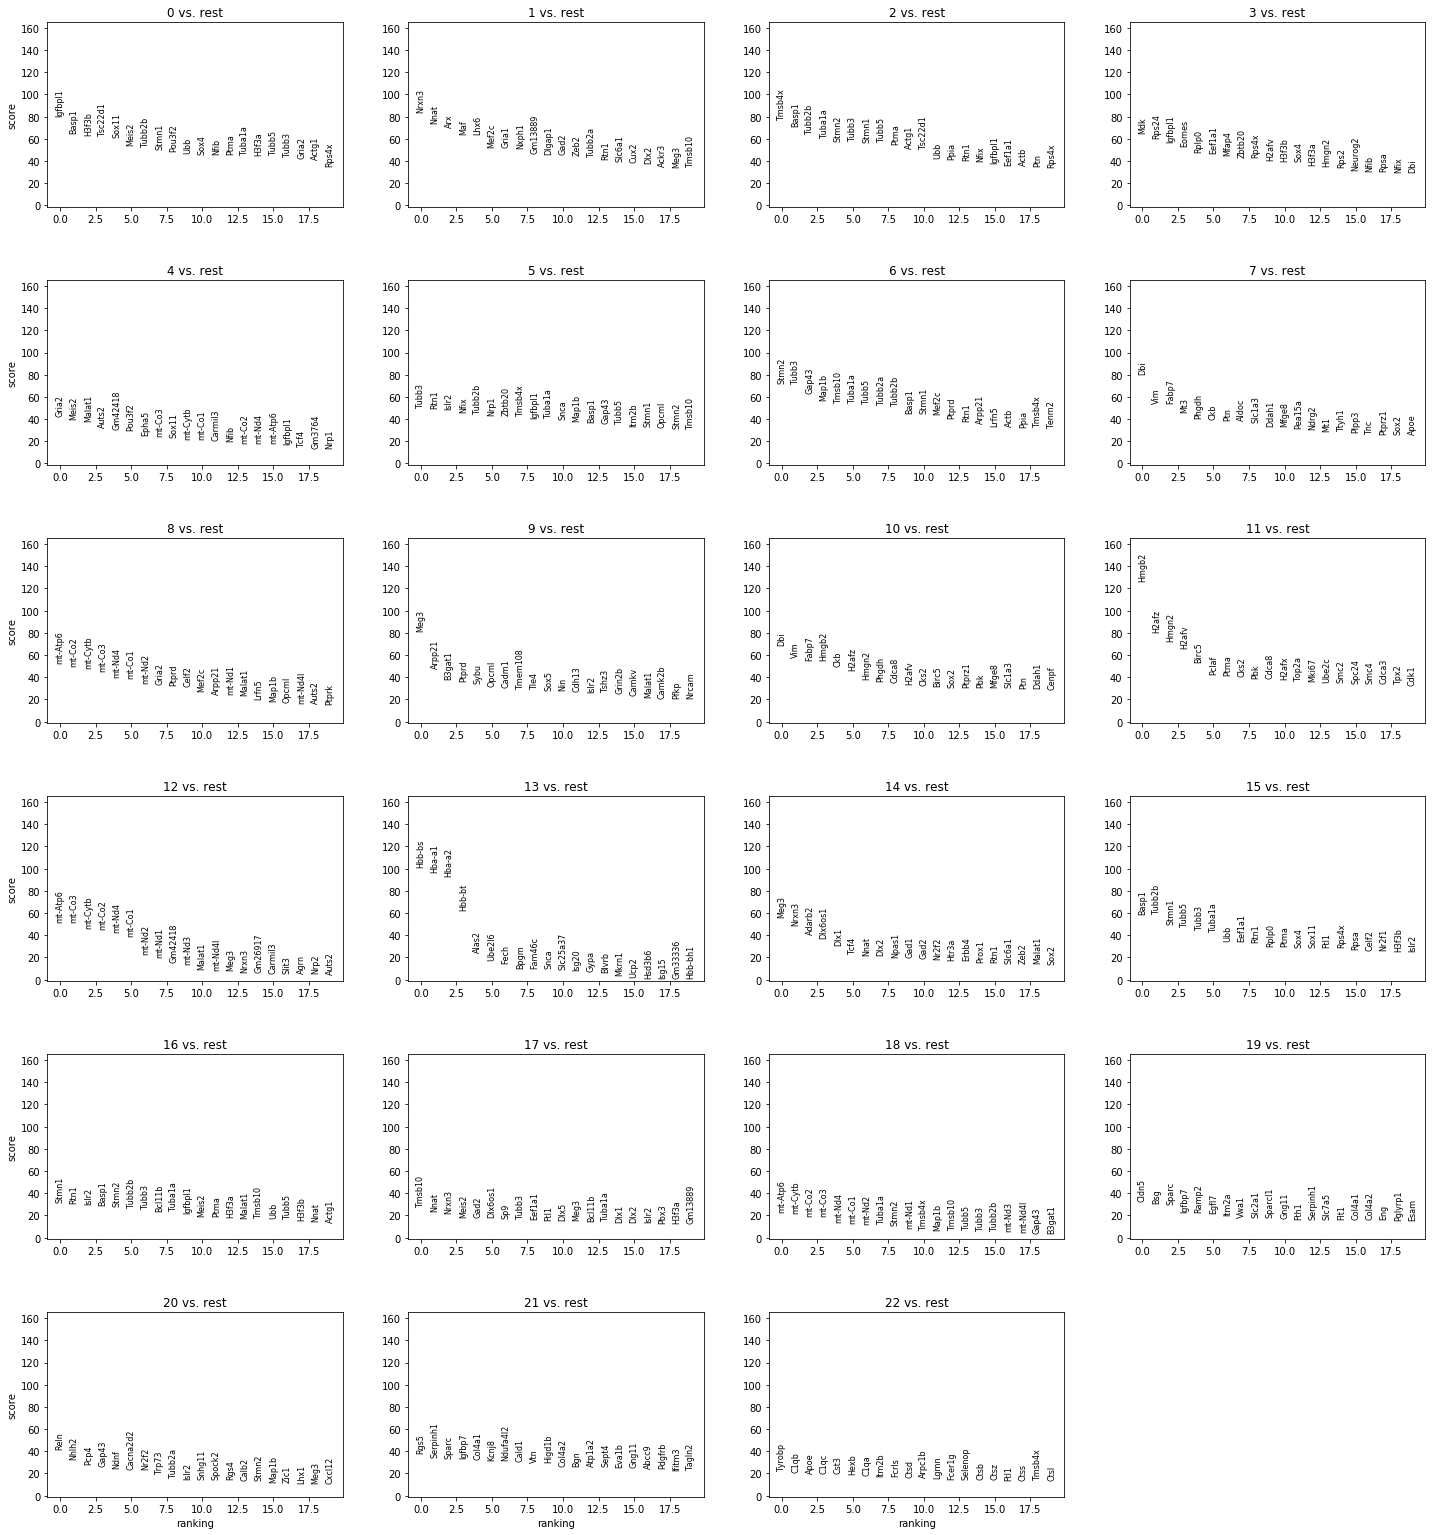

In [20]:
#step 3 distinguishing genes by t-test
sc.tl.rank_genes_groups(adata, groupby='louvain', use_raw=True, groups='all', reference='rest', n_genes=100, rankby_abs=False, key_added=None, copy=False, method='t-test', corr_method='benjamini-hochberg')
sc.pl.rank_genes_groups(adata, groups=None, n_genes=20, gene_symbols=None, key=None, fontsize=8, ncols=4, sharey=True, show=None, save=None, ax=None)

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


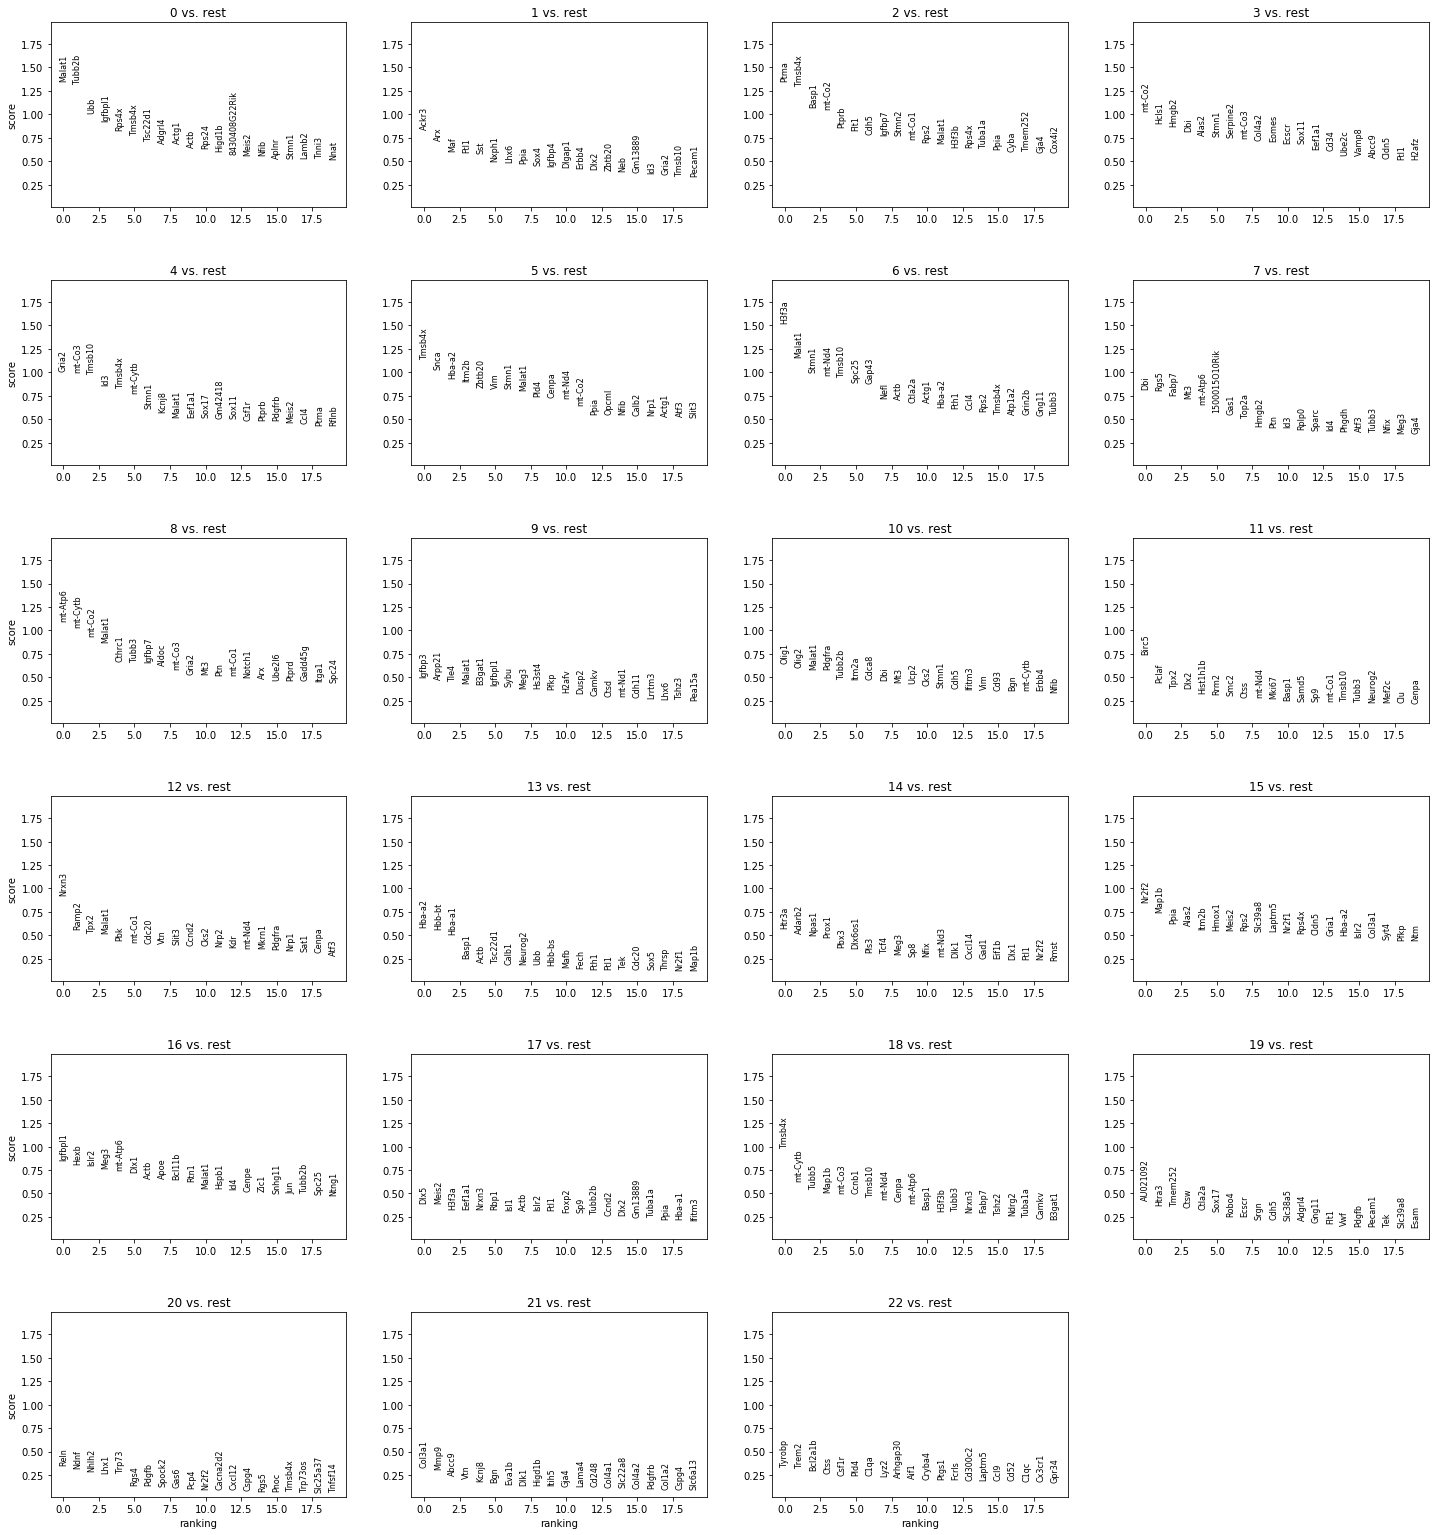

In [23]:
#step 3 distinguishing genes by logreg
sc.tl.rank_genes_groups(adata, groupby='louvain', use_raw=True, groups='all', reference='rest', n_genes=100, rankby_abs=False, key_added=None, copy=False, method='logreg', corr_method='benjamini-hochberg')
sc.pl.rank_genes_groups(adata, groups=None, n_genes=20, gene_symbols=None, key=None, fontsize=8, ncols=4, sharey=True, show=None, save=None, ax=None)

In [34]:
marker_genes = ['Igfbpl1', 'Nrxn3', 'Tmsb4x', 'Mdk', 'Gria2','Tubb3', 
                'Stmn2', 'Dbi', 'mt-Atp6', 'Meg3', 'Hmgb2', 'mt-Atp6', 'Hbb-bs',
               'Meg3', 'Basp1', 'Stmn1', 'Tmsb10', 'Reln', 'Rgs5', 'Tyrobp']

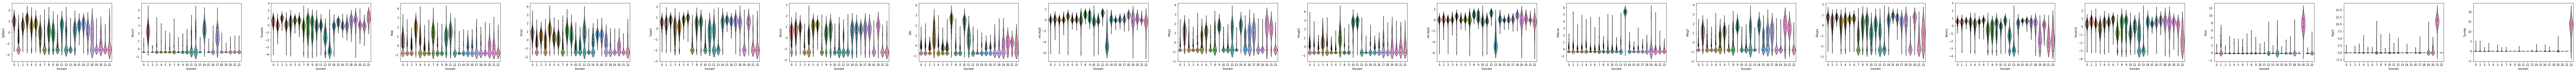

In [35]:
sc.pl.violin(adata, marker_genes, groupby='louvain')

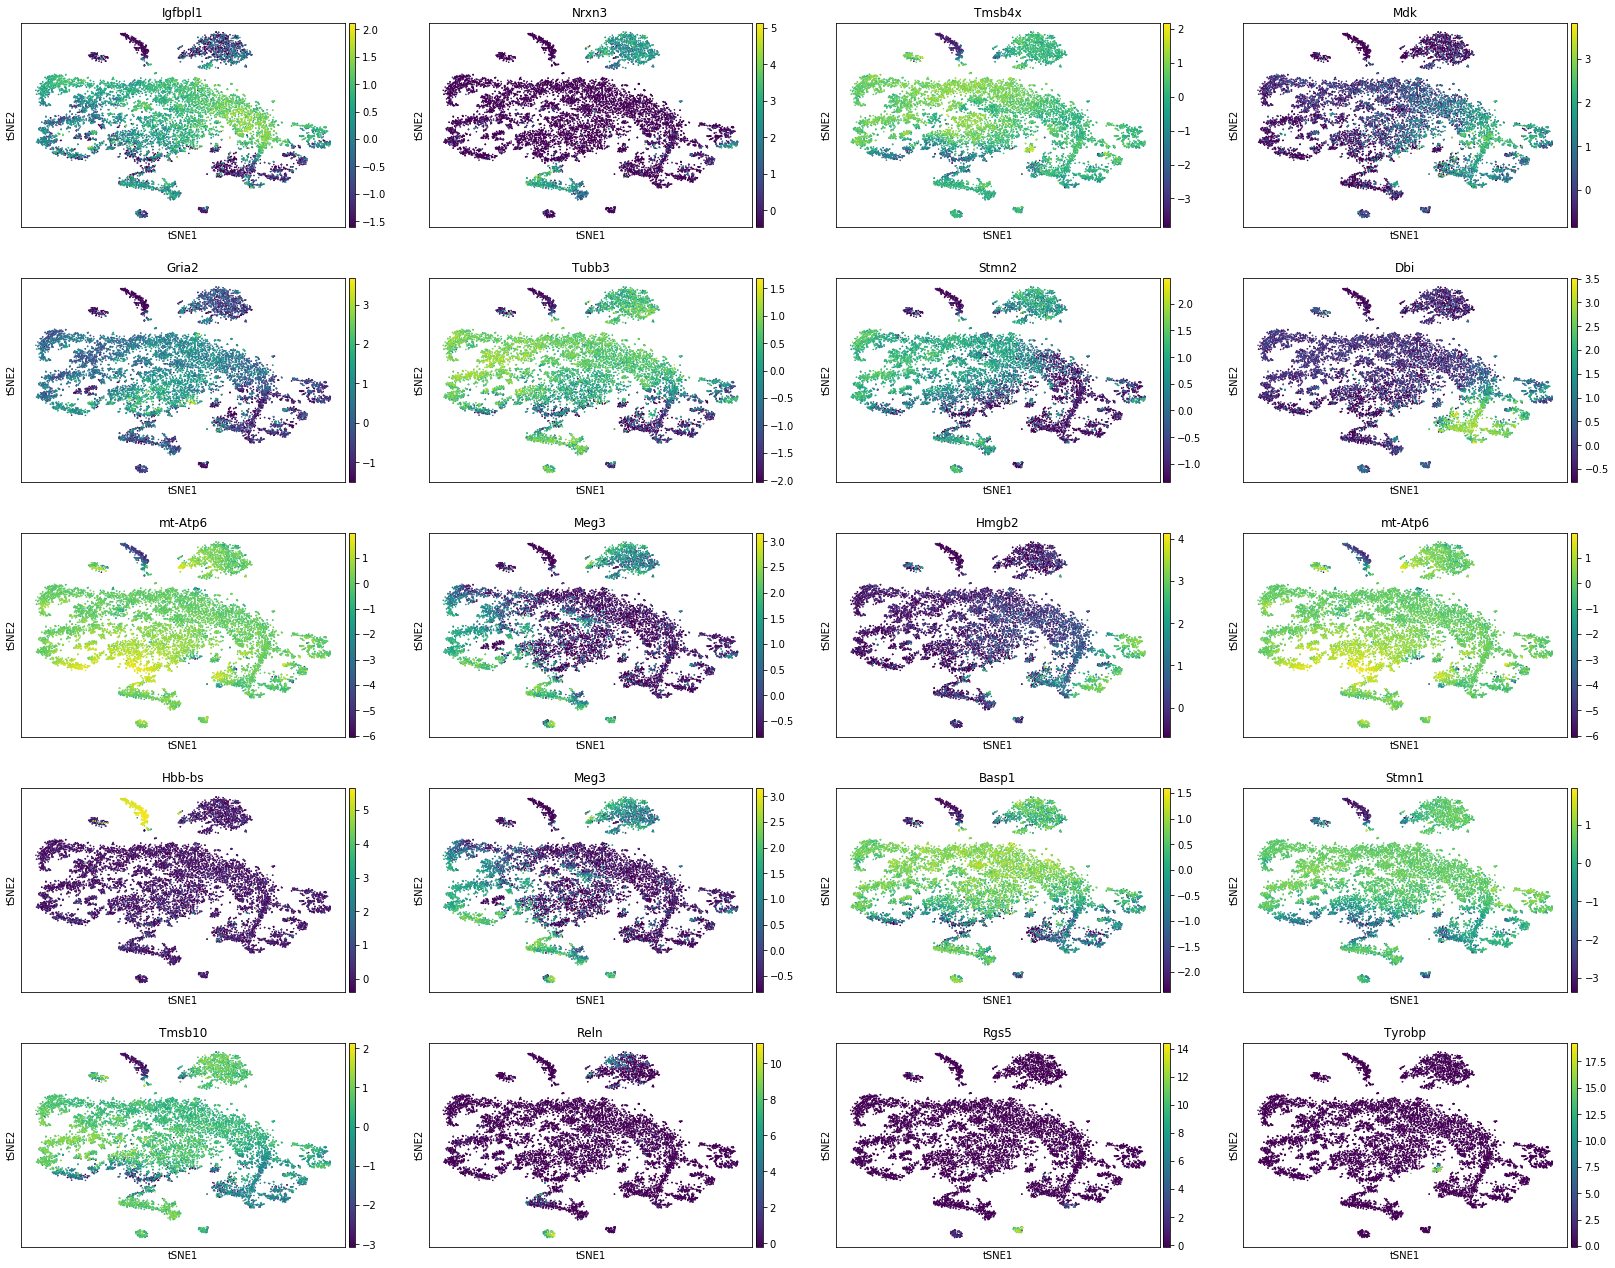

In [36]:
sc.pl.tsne(adata, color= marker_genes)